<a href="https://colab.research.google.com/github/Hastighn/Lung-cancer-treatment--agent-based-model/blob/main/Chapter_3_ABS_Modeling_with_WGS_Capacity_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Mesa

In [ ]:
!pip install -q mesa


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Import Dependencies

In [ ]:
import mesa
import random
import numpy as np
import pandas as pd
from mesa.time import RandomActivation
from mesa.space import ContinuousSpace
import matplotlib.pyplot as plt


# General Hospital class

In [ ]:
#Initializing GeneralHospital class
class GeneralHospital(mesa.Agent):
  def __init__(self, unique_id, model, G_success_rate, G_initial_patient, alpha, G_cost):
    super().__init__(unique_id, model)
    self.agent_type = "GeneralHospital"
    self.success_rate = G_success_rate
    self.initial_patient = G_initial_patient
    self.G_diagnosed = []
    self.closest_teaching_hospital = None
    self.Gprocessing_time = 15
    self.refer_to_T = []
    self.refer_to_A= []
    self.cost = G_cost
    self.G_totalcost = 0
    self.Alpha = alpha
    self.waiting_time = 0  #for all patient in General hospital
    self.referraltime = 0 #for a patient who referred from G to T or A
  def step(self):
    self.G_diagnosed = []
    #perform biomarker tests for patients
    for i in range(1, self.initial_patient + 1):
      Random = np.random.rand()
      if Random <= self.success_rate:
       self.G_diagnosed.append(1)
      else:
        if Random <= self.Alpha:
         self.refer_to_T.append([1,self.model.schedule.steps])
        else:
         self.refer_to_A. append([1, self.model.schedule.steps])

    #calculate total cost for all patients
    self.G_totalcost = self.cost * self.initial_patient
    #calculate waiting time for patients in General Hospital
    self.waiting_time = self.Gprocessing_time * (len(self.G_diagnosed) + len(self.refer_to_A) + len(self.refer_to_T)) + self.referraltime



In [ ]:
    # Way 2
    self.waiting_time = self.Gprocessing_time * self.initial_patient + self.referraltime

# Teaching Hospital class

In [ ]:
#Initializing TeachingHospital class
class TeachingHospital(mesa.Agent):
  def __init__(self, unique_id, model, T_success_rate, patient_accpt, T_cost):
    super().__init__(unique_id, model)
    self.agent_type = "TeachingHospital"
    self.success_rate = T_success_rate
    self.patient_accpt = patient_accpt
    self.T_diagnosed = []
    self.refer_to_A = []
    self.refer_from_G = []
    self.refer_fromG_history = []
    self.closest_academic_hospital = None
    self.total_p = patient_accpt
    self.Tprocessing_time = 15
    self.cost = T_cost
    self.T_totalcost = 0
    self.T_refercost = 0
    self.waiting_time = 0   #for all patients at Teaching hospital
    self.referraltime = 0   #for a patient who referred from T to A

  def step(self):
  # Calculate total number of patients in the TeachingHospital
     self.total_p = self.patient_accpt + len(self.refer_from_G)
     self.T_diagnosed = []
     self.refer_fromG_history = len(self.refer_from_G)
     self.refer_from_G = []

    #perform biomarker tests for patients
     for i in range(1, self.total_p + 1 ):
       Random = np.random.rand()
       if Random <= self.success_rate:
         self.T_diagnosed.append(1)
       else:
         self.refer_to_A.append([1,self.model.schedule.steps])

    #calculate total cost for all patients
     self.T_totalcost = self.cost * self.total_p
    #calculate referred cost
     self.T_refercost = self.cost * self.refer_fromG_history
    #calculate waiting time for patients in Teaching Hospital
     self.waiting_time = self.Tprocessing_time * self.total_p + self.referraltime


# Academic Hospital class

In [ ]:
#Initializing AcademicHospital class
class AcademicHospital(mesa.Agent):
  def __init__(self, unique_id, model, A_success_rate, A_patient_accpt, dr_lh, p_lh, A_cost):
    super().__init__(unique_id, model)
    self.agent_type = "AcademicHospital"
    self.success_rate = A_success_rate
    self.A_patient_accpt = A_patient_accpt
    self.refer_from_T = []
    self.refer_from_G = []
    self.total_p_a = A_patient_accpt
    self.physician_lh = dr_lh
    self.patient_lh = p_lh
    self.probability = self.patient_lh * self.physician_lh
    self.refer_to_WGS = []
    self.notdiagnosed = []
    self.A_diagnosed = []
    self.soc = []
    self.closest_wgs = None
    self.refer_from_WGS = []
    self.Aprocessing_time = 18
    self.refer_fromT_history = []
    self.refer_fromG_history = []
    self.refer_fromWGS_history = []
    self.cost = A_cost
    self.A_totalcost = 0
    self.A_refercost = 0
    self.waiting_time = 0   #for all patients at Academic hospital
    self.referraltime = 0   #for a patient who referred from A to WGS

  def step(self):
    self.total_p_a = self.A_patient_accpt + len(self.refer_from_T) + len(self.refer_from_WGS) + len(self.refer_from_G)
    self.A_diagnosed = []
    self.refer_fromT_history = len(self.refer_from_T)
    self.refer_fromWGS_history = len(self.refer_from_WGS)
    self.refer_fromG_history = len(self.refer_from_G)
    self.refer_from_T = []
    self.refer_from_G = []
    self.refer_from_WGS = []
    self.soc_patients = 0

    # perform biomarker test for patienst
    for i in range(1, self.total_p_a + 1):
      Random = np.random.rand()
      if Random <= self.probability:
        self.refer_to_WGS.append([1, self.unique_id, self.model.schedule.steps])
      else:
        self.soc_patients += 1
        self.soc.append([1,self.model.schedule.steps])
        Random3 = np.random.rand()
        if Random3 <= self.success_rate:
          self.A_diagnosed.append(1)
        else:
          self.refer_to_WGS.append([1, self.unique_id, self.model.schedule.steps])
    #calculate total cost for all patients
    self.A_totalcost = self.cost * self.soc_patients
    #calculate referred cost
    self.A_refercost = self.cost * self.refer_fromT_history +  self.cost * self.refer_fromWGS_history
    #calculate waiting time for all patients in Academic Hospital
    self.waiting_time = self.Aprocessing_time * self.total_p_a + self.referraltime



# WGS Facility class

In [ ]:
#Initializing WGSFacility class
class WGSFacility(mesa.Agent):
  def __init__(self, unique_id, model, percentage, WGS_cost, capacity):
    super().__init__(unique_id, model)
    self.agent_type = "WGSFacility"
    self.refer_from_A = []
    self.tumor_percentage = percentage
    self.wgs_diagnosed = []
    self.refer_to_A = []
    self.total_wgs = 0
    self.WGSprocessing_time = 14
    self.refer_fromA_history = []
    self.cost = WGS_cost
    self.WGS_totalcost = []
    self.WGS_refercost = 0
    self.waiting_time = 0
    self.referraltime = 0
    self.in_queue = []
    self.capacity = capacity
    self.wgs_patients = 0

  def step(self):
    self.total_wgs = len(self.refer_from_A) + len(self.in_queue)
    wgs_patients = self.refer_from_A
    self.in_queue = []
    self.wgs_diagnosed = []
    #self.refer_fromA_history= len((self.refer_from_A))
    self.refer_from_A = []
    remaining_capacity = self.capacity

    for i in range(1, self.total_wgs + 1):
      if remaining_capacity == 0:
        self.in_queue.append(1)
      else:
        remaining_capacity -= 1
        Random4 = np.random.rand()
        if Random4 <= self.tumor_percentage:
         self.wgs_diagnosed.append(1)
        else:
         if i <= len(wgs_patients):
          self.refer_to_A.append([1, wgs_patients[i-1][1], self.model.schedule.steps])

    #calculate total cost for all patients
    self.WGS_totalcost = self.cost * self.total_wgs
    #calculate referred patients cost
    self.WGS_refercost = self.cost * self.total_wgs
    #calculate waiting time for all patients in Academic Hospital
    self.waiting_time =  self.WGSprocessing_time *  self.refer_fromA_history

In [ ]:

wgs_patients = 6
in_queue = []
total_wgs = 5 + len(in_queue)
wgs_diagnosed = []
refer_from_A = []
remaining_capacity = 4
refer_to_A = []

for i in range(1, total_wgs + 1):
   if remaining_capacity == 0:
      in_queue.append(1)
   else:
      remaining_capacity -= 1
      Random4 = np.random.rand()
      if Random4 <= 0.66:
       wgs_diagnosed.append(1)
      else:
        #self.waiting_time += self.referraltime
       refer_to_A.append([1, wgs_patients[i][1]])
print(in_queue)

TypeError: 'int' object is not subscriptable

# Model Class

In [ ]:
class HospitalModel(mesa.Model):
  def __init__(self, width, height, num_general, num_teaching, num_academic, num_wgs, alpha_value, WGS_value, WGS_capacity, max_steps):
    super().__init__()
    self.width = width
    self.height = height
    #following varoables are for creating agents
    self.num_general = num_general
    self.num_teaching = num_teaching
    self.num_academic = num_academic
    self.num_wgs = num_wgs
    #following variables are for diagnosed patients in 4 types of hospitals
    self.diagnosed_General = []
    self.diagnosed_Teaching = []
    self.diagnosed_Academic = []
    self.diagnosed_WGS = []
    #self.wgs_diagnosed = []
    self.totaldiagnosed = []
    #following variables are for total patients in 4 types of hospitals
    self.total_General = []
    self.total_Teaching = []
    self.total_Academic = []
    self.total_wg = []
    self.total_p = []
    #self.diagnosed_general_over_time = []
    #self.diagnosed_teaching_over_time = []
    #self.diagnosed_academic_over_time = []
    #self.diagnosed_wgs_over_time = []
    self.total_diagnosed_patients = 0
    #self.total_general_over_time = []
    #self.total_teaching_over_time = []
    #self.total_academic_over_time = []
    #self.total_wgs_over_time = []
    self.refer_to_Teaching = []
    self.refer_to_Academic = []
    #following variables are for total cost for each hospital
    self.totalcost_g = []
    self.totalcost_t = []
    self.totalcost_a = []
    self.totalcost_wgs = []
    #following variable is for total cost for ALL hospitals
    self.totalcost = []
    self.ratio = []
    #following variables for total cost for all hospitals
    #self.cost_g = []
    #self.cost_t = []
    #self.cost_a = []
    #self.cost_wgs = []
    self.alpha_value = alpha_value
    self.WGS_value = WGS_value
    self.WGS_capacity = WGS_capacity
    self.max_steps = max_steps
    #self.refer_Teaching = []
    #initiate activation schedule
    self.space = ContinuousSpace(width, height, True)  # True makes the space toroidal
    self.schedule = mesa.time.RandomActivationByType(self)
    #self.grid = mesa.space.MultiGrid(width, height, True)

#Create Agents
    self.random.seed(100)
    #create General Hospital agents
    for i in range(1, self.num_general + 1):
        G_hospital = GeneralHospital(i, self, G_success_rate = 0.58, G_initial_patient = 2, alpha = self.alpha_value, G_cost = 334.14)
        self.schedule.add(G_hospital)
        # Add the agent to a random grid cell
        x = random.uniform(0, self.space.x_max)
        y = random.uniform(0, self.space.y_max)
        # place_agent method adds the coordinate to the agent automatically
        self.space.place_agent(G_hospital, (x,y))

    #create Teaching Hospital agents
    for i in range(1, self.num_teaching + 1):
        T_hospital = TeachingHospital(i, self, T_success_rate = 0.6,  patient_accpt = 1, T_cost = 536.02 )
        self.schedule.add(T_hospital)
        x = random.uniform(0, self.space.x_max)
        y = random.uniform(0, self.space.y_max)
        # place_agent method adds the coordinate to the agent automatically
        self.space.place_agent(T_hospital, (x,y))

    #create Academic Hospital agents
    for i in range(1, self.num_academic + 1):
        A_hospital = AcademicHospital(i, self, A_success_rate = 0.66, A_patient_accpt = 0.9, dr_lh = 0.9, p_lh = 0.9, A_cost = 536.02  )
        self.schedule.add(A_hospital)
        x = random.uniform(0, self.space.x_max)
        y = random.uniform(0, self.space.y_max)
        # place_agent method adds the coordinate to the agent automatically
        self.space.place_agent(A_hospital, (x,y))

    #create WGS Facility agents
    for i in range(1, self.num_wgs + 1):
        WGS = WGSFacility(i, self, percentage = 0.66, WGS_cost = self.WGS_value, capacity = self.WGS_capacity)
        self.schedule.add(WGS)
        x = random.uniform(0, self.space.x_max)
        y = random.uniform(0, self.space.y_max)
        # place_agent method adds the coordinate to the agent automatically
        self.space.place_agent(WGS, (x,y))


    for agent in self.schedule.agents:
        print(agent.unique_id, agent.agent_type) #agent.index


    #Calculate the closest teaching hospital for all general hospitals
    for agent in self.schedule.agents:
        if agent.agent_type == "GeneralHospital":
          closest_teaching_hospital = None
          closest_academic_hospital = None
          closest_distanceT = float('inf')
          closest_distanceA = float('inf')  # Initialize with a large value
          for th in self.schedule.agents:
             if th.agent_type == "TeachingHospital":
                 distance = self.calculate_distance(agent.pos, th.pos)
                 if distance < closest_distanceT:
                     closest_distanceT = distance
                     closest_teaching_hospital = th.unique_id
          agent.closest_teaching_hospital = closest_teaching_hospital

          for ac in self.schedule.agents:
             if ac.agent_type == "AcademicHospital":
                 distance = self.calculate_distance(agent.pos, ac.pos)
                 if distance <  closest_distanceA:
                     closest_distanceA = distance
                     closest_academic_hospital = ac.unique_id
          agent.closest_academic_hospital = closest_academic_hospital

    #Calculate the closest academic hospital for all teaching hospitals
    for agent in self.schedule.agents:
        if agent.agent_type == "TeachingHospital":
            closest_academic_hospital = None
            closest_distance = float('inf')  # Initialize with a large value
            for ac in self.schedule.agents:
                if ac.agent_type == "AcademicHospital":
                    distance = self.calculate_distance(agent.pos, ac.pos)
                    if distance < closest_distance:
                        closest_distance = distance
                        closest_academic_hospital = ac.unique_id
            agent.closest_academic_hospital = closest_academic_hospital

    #Calculate the closest WGS facility for all academic hospitals
    for agent in self.schedule.agents:
        if agent.agent_type == "AcademicHospital":
            closest_wgs_facility = None
            closest_distance = float('inf')  # Initialize with a large value
            for wg in self.schedule.agents:
                if wg.agent_type == "WGSFacility":
                    distance = self.calculate_distance(agent.pos, wg.pos)
                    if distance < closest_distance:
                        closest_distance = distance
                        closest_wgs_facility = wg.unique_id
            agent.closest_wgs = closest_wgs_facility


    #self.datacollector = mesa.DataCollector(
          #agent_reporters={"Count": "x"})
    self.datacollector = mesa.DataCollector()

  #Calculate the Euclidean distance between two positions.
  def calculate_distance(self, pos1, pos2):
    x1, y1 = pos1
    x2, y2 = pos2
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5


#define the referral logic
  def step(self):
        for agent in self.schedule.agents:
            if agent.agent_type == "GeneralHospital":
              for th in self.schedule.agents:
                if th.agent_type == "TeachingHospital" and th.unique_id == agent.closest_teaching_hospital:
                  refer_to_T  = [r for r in agent.refer_to_T if self.schedule.steps-r[1]>= agent.Gprocessing_time ]
                  th.refer_from_G.extend(refer_to_T)
                  agent.refer_to_T = [r for r in agent.refer_to_T if self.schedule.steps-r[1]< agent.Gprocessing_time ]


              for ac in self.schedule.agents:
                if ac.agent_type == "AcademicHospital" and ac.unique_id == agent.closest_academic_hospital:
                  refer_to_A = [r for r in agent.refer_to_A if self.schedule.steps-r[1] >= agent.Gprocessing_time ]
                  ac.refer_from_G.extend(refer_to_A)
                  agent.refer_to_A = [r for r in agent.refer_to_A if self.schedule.steps-r[1] < agent.Gprocessing_time ]


        for agent in self.schedule.agents:
            if agent.agent_type == "TeachingHospital":
              for ac in self.schedule.agents:
                if ac.agent_type == "AcademicHospital" and ac.unique_id == agent.closest_academic_hospital:
                  refer_to_A = [r for r in agent.refer_to_A if self.schedule.steps-r[1] >= agent.Tprocessing_time]
                  ac.refer_from_T.extend(refer_to_A)
                  agent.refer_to_A = [r for r in agent.refer_to_A if self.schedule.steps-r[1] < agent.Tprocessing_time ]


        for agent in self.schedule.agents:
            if agent.agent_type == "AcademicHospital":
              for wg in self.schedule.agents:
                if wg.agent_type == "WGSFacility" and wg.unique_id == agent.closest_wgs:
                  refer_to_WGS = [r for r in agent.refer_to_WGS if self.schedule.steps-r[2] >= agent.Aprocessing_time ]
                  wg.refer_from_A.extend(refer_to_WGS)
                  agent.refer_to_WGS = [r for r in agent.refer_to_WGS if self.schedule.steps-r[2] < agent.Aprocessing_time]


        for agent in self.schedule.agents:
           if agent.agent_type == "WGSFacility":
             for ac in self.schedule.agents:
                if ac.agent_type == "AcademicHospital":
                  refer_to_A = [r for r in agent.refer_to_A if (self.schedule.steps-r[2] >= agent.WGSprocessing_time  and r[1] == ac.unique_id)]
                  ac.refer_from_WGS.extend(refer_to_A)
                  agent.refer_to_A = [r for r in agent.refer_to_A if self.schedule.steps-r[2] <= agent.WGSprocessing_time ]

        # Collect data and advance the schedule
        self.datacollector.collect(self)
        self.schedule.step()
        diagnosedgeneral = 0
        diagnosedteaching = 0
        diagnosedacademic = 0
        diagnosedwgs = 0
        total_diagnosed = 0
        totalgeneral = 0
        totalteaching = 0
        totalacademic = 0
        totalwgs = 0
        totalcost_G = 0
        totalcost_T = 0
        totalcost_A = 0
        totalcost_WGS = 0
        total_cost = 0

#printing the results
        for agent in self.schedule.agents:
          #General Hospital
          if agent.agent_type == "GeneralHospital":
            diagnosedgeneral = diagnosedgeneral + len(agent.G_diagnosed)
            #calculate total patients for General Hospitals
            totalgeneral = totalgeneral + agent.initial_patient
            #calculate total cost for General Hospital
            totalcost_G = totalcost_G + agent.G_totalcost

            print("\033[1mGeneral\033[0m", agent.unique_id)
            #print("Location:", agent.pos)
            print("Total Patients:", agent.initial_patient )
            print("diagnosed:", len(agent.G_diagnosed))
            print("referred to Teaching Hospital:", len( agent.refer_to_T))
            print("closest Teaching:", agent.closest_teaching_hospital)
            print("Total cost:", agent.G_totalcost)


          #Teaching Hospital
          elif agent.agent_type == "TeachingHospital":
            diagnosedteaching = diagnosedteaching + len(agent.T_diagnosed)
            #calculate total patients for Teaching Hospital
            totalteaching = totalteaching + agent.total_p
            #calculate total cost for Teaching Hospital
            totalcost_T = totalcost_T + agent.T_totalcost

            print("\033[1mTeaching\033[0m", agent.unique_id)
            #print("Location:", agent.pos)
            print("Total Patientes:",agent.total_p)
            print("referred from General Hospital:", agent.refer_fromG_history)
            print("diagnosed:", len(agent.T_diagnosed))
            print("referred to Academic Hospital:", len(agent.refer_to_A))
            print("closest Academic:", agent.closest_academic_hospital)
            print("Total cost:", agent.T_totalcost)
            print("Referred patients cost:", agent.T_refercost)

          #Academic Hospital
          elif agent.agent_type == "AcademicHospital":
            diagnosedacademic = diagnosedacademic + len(agent.A_diagnosed)
            #calculate total patients for Academic Hospital
            totalacademic = totalacademic + agent.total_p_a
            #calculate total cost for Academic Hospital
            totalcost_A = totalcost_A + agent.A_totalcost


            print("\033[1mAcademic\033[0m", agent.unique_id)
            #print("Location:", agent.pos)
            print("Total Patients: ", agent.total_p_a)
            print("referred from Teaching Hospital:", agent.refer_fromT_history)
            print("diagnosed:", len(agent.A_diagnosed))
            print("WGS Referral:", len(agent.refer_to_WGS))
            print("SoC Referral:", len(agent.soc))
            print("Not diagnosed:", len(agent.notdiagnosed))
            print("Closest WGS Facility:",agent.closest_wgs)
            print("Total cost:", agent.A_totalcost)
            print("Referred patients cost:", agent.A_refercost)

          #WGS Facility
          elif agent.agent_type == "WGSFacility":
             diagnosedwgs = diagnosedwgs + len(agent.wgs_diagnosed)
             #calculate total patients for WGS Facility
             totalwgs = totalwgs + agent.total_wgs
             #calculate totalcost for WGS Facility
             totalcost_WGS = totalcost_WGS + agent.WGS_totalcost

             print("\033[1mWGS Facility\033[0m", agent.unique_id)
             #print("Location:", agent.pos)
             print("referred from Academic Hospital:", agent.refer_fromA_history)
             print("Total Patients:", agent.total_wgs)
             print("diagnosed:", len(agent.wgs_diagnosed))
             print("Refer to Academic Hospital:", len(agent.refer_to_A))
             print("Total cost:", agent.WGS_totalcost)
             print("Referred patients cost:", agent.WGS_refercost)

             #calculate total diagnosed patients for all hospitals
             #total_diagnosed = diagnosedgeneral + diagnosedteaching + diagnosedacademic + diagnosedwgs

             #calculate total cost for all hospitals
             total_cost = totalcost_G + totalcost_T + totalcost_A + totalcost_WGS

        #variables related to diagnosed patients for each hospital
        self.diagnosed_General.append(diagnosedgeneral)
        self.diagnosed_Teaching.append(diagnosedteaching)
        self.diagnosed_Academic.append(diagnosedacademic)
        self.diagnosed_WGS.append(diagnosedwgs)
        #variables related to calculate total patients for each hospital
        self.total_General.append(totalgeneral)
        self.total_Teaching.append(totalteaching)
        self.total_Academic.append(totalacademic)
        self.total_wg.append(totalwgs)
        #variables related to calculate total cost for each hospital
        self.totalcost_g.append(totalcost_G)
        self.totalcost_t.append(totalcost_T)
        self.totalcost_a.append(totalcost_A)
        self.totalcost_wgs.append(totalcost_WGS)
        #self.totalcost.append(total_cost)

        #following variables are for total diagnosed patients over time
        #diagnosed_general = sum(len(agent.G_diagnosed) for agent in self.schedule.agents if isinstance(agent, GeneralHospital))
        #diagnosed_teaching = sum(len(agent.T_diagnosed) for agent in self.schedule.agents if isinstance(agent, TeachingHospital))
        #diagnosed_academic = sum(len(agent.A_diagnosed) for agent in self.schedule.agents if isinstance(agent, AcademicHospital))
        #diagnosed_wgs = sum(len(agent.wgs_diagnosed) for agent in self.schedule.agents if isinstance(agent, WGSFacility) )
        refer_to_teaching = sum(len(agent.refer_from_G) for agent in self.schedule.agents if isinstance(agent,TeachingHospital))
        refer_to_academic = sum(len(agent.refer_from_T) for agent in self.schedule.agents if isinstance(agent,AcademicHospital))
        #self.diagnosed_general_over_time.append(diagnosed_general)
        #self.diagnosed_teaching_over_time.append(diagnosed_teaching)
        #self.diagnosed_academic_over_time.append(diagnosed_academic)
        #self.diagnosed_wgs_over_time.append(diagnosed_wgs)
        #self.refer_to_Teaching.append(refer_to_teaching)
        #self.refer_to_Academic.append(refer_to_academic)

        #following variables are for total patients over time
        #total_general = sum(agent.initial_patient for agent in self.schedule.agents if isinstance(agent, GeneralHospital))
        #total_teaching = sum(agent.total_p for agent in self.schedule.agents if isinstance(agent, TeachingHospital))
        #total_academic = sum(agent.total_p_a for agent in self.schedule.agents if isinstance(agent, AcademicHospital))
        #total_wg =sum(agent.total_wgs for agent in self.schedule.agents if isinstance(agent, WGSFacility))
        #self.total_general_over_time.append(total_general)
        #self.total_teaching_over_time.append(total_teaching)
        #self.total_academic_over_time.append(total_academic)
        #self.total_wgs_over_time.append(total_wg)

        #following variables are for total cost for each hospital
        #generalcost = sum(agent.G_totalcost for agent in self.schedule.agents if isinstance(agent, GeneralHospital ))
        #teachingcost = sum(agent.T_totalcost for agent in self.schedule.agents if isinstance(agent, TeachingHospital))
        #academiccost = sum(agent.A_totalcost for agent in self.schedule.agents if isinstance(agent, AcademicHospital))
        #wgscost = sum(agent.WGS_totalcost for agent in self.schedule.agents if isinstance(agent, WGSFacility))
        #self.cost_g.append(generalcost)
        #self.cost_t.append(teachingcost)
        #self.cost_a.append(academiccost)
        #self.cost_wgs.append(wgscost)

        self.total_p = [x + y + z + w for x, y, z, w in zip(self.total_General,
                                                   self.total_Teaching,
                                                   self.total_Academic,
                                                   self.total_wg)]

        self.totaldiagnosed = [x + y + z + w for x, y, z, w in zip(self.diagnosed_General,
                                                   self.diagnosed_Teaching,
                                                   self.diagnosed_Academic,
                                                   self.diagnosed_WGS)]

        self.totalcost = [x + y + z + w for x, y, z, w in zip(self.totalcost_g,
                                                   self.totalcost_t,
                                                   self.totalcost_a,
                                                   self.totalcost_wgs)]



        #printing total number of diagnosed patients, patients and total cost
        print("Total diagnosed patients at General Hospitals: ", self.diagnosed_General)
        print("Total diagnosed patients at Teaching Hospitals: ", self.diagnosed_Teaching)
        print("Total diagnosed patients at Academic Hospitals: ", self.diagnosed_Academic)
        print("Total diagnosed patients at WGS Facility:",self.diagnosed_WGS )
        print("Total patients at General Hospitals: ", self.total_General)
        print("Total patients at Teaching Hospitals: ", self.total_Teaching)
        print("Total patients at Academic Hospitals: ", self.total_Academic)
        print("Total patients at WGS Facility:", self.total_wg)
        #print("Total Dignosed Patienes for all hospitals:", total_diagnosed)
        print("Total cost for all General Hospitals:",self.totalcost_g )
        print("Total cost for all Teaching Hospitals:",self.totalcost_t)
        print("Total cost for all Academic Hospitals:",self.totalcost_a)
        print("Total cost for all WGS Facilities:",self.totalcost_wgs)
        print("Total cost for all types of hospitals:", total_cost)
        print("Total cost:", self.totalcost)
        print("Total diagnosed:", np.cumsum(self.totaldiagnosed))


#functions for visualizing
#we have seven grpah as below:
#1 hospital locations
#2 total diganosed patients for each hospita
#3 total diagnosed patients for all hospitals
#4 total patients for each hospital
#5 total patients for all hospitals
#6 total cost for each hospital
#7 total cost for all hospital


  #Graph for total diagnosed patients for each hospital
  #Not Cumulative

  def diagnosed_for_each_hospital(self):
    plt.figure(figsize=(5, 3))
    plt.plot(self.diagnosed_General, label = 'General Hospital', color = 'red')
    plt.plot(self.diagnosed_Teaching, label = 'Teaching Hospital', color = 'green')
    plt.plot(self.diagnosed_Academic, label = 'Academic Hospital', color = 'blue')
    plt.plot(self.diagnosed_WGS, label = 'WGS Facility', color = 'yellow')
    plt.title('Total Diagnosed Patients Over Time')
    plt.xlabel('Time Steps')
    plt.ylabel('Number of Diagnosed patients')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()


  #Graph for cumulative number of diagnosed patients for each hospital.
  def cumulative_diagnosed_for_each_hospital(self):
    cumulative_diagnosed_g = np.cumsum(self.diagnosed_General)
    cumulative_diagnosed_t = np.cumsum(self.diagnosed_Teaching)
    cumulative_diagnosed_a = np.cumsum(self.diagnosed_Academic)
    cumulative_diagnosed_wgs = np.cumsum(self.diagnosed_WGS)
    plt.figure(figsize=(5, 3))
    plt.plot(cumulative_diagnosed_g, label = 'General Hospital', color = 'red')
    plt.plot(cumulative_diagnosed_t, label = 'Teaching Hospital', color = 'green')
    plt.plot(cumulative_diagnosed_a, label = 'Academic Hospital', color = 'blue')
    plt.plot(cumulative_diagnosed_wgs, label = 'WGS Facility', color = 'yellow')
    plt.title('Cumulative Diagnosed Patients Over Time')
    plt.xlabel('Time Steps')
    plt.ylabel('Number of diagnosed patients')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

 # Graph for total number of diagnosed patients for all hospitals. It is not cumulative.
  def total_diagnosed(self):
    plt.figure(figsize=(5, 3))
    plt.plot(self.totaldiagnosed, label= 'total Diagnosed', color = 'black')
    plt.title ('Total number of Diagnosed Patients')
    plt.xlabel('Time Steps')
    plt.ylabel('Number of Total Diagnosed patient')
    plt.grid(True)
    plt.show()

  # Graph for cumulative total number of diagnosed patients for all hospitals.
  def cumulative_total_diagnosed(self):
    cumulative_diagnosed = np.cumsum(self.totaldiagnosed)
    plt.figure(figsize=(5, 3))
    plt.plot(cumulative_diagnosed, label= 'total Diagnosed', color = 'black')
    plt.title ('Cumulative Total number of Diagnosed Patients')
    plt.xlabel('Time Steps')
    plt.ylabel('Number of Total Diagnosed patient')
    plt.grid(True)
    plt.show()

  #Graph for total patients for each hospital
  def total_patients_for_each_hospital(self):
    plt.figure(figsize=(5, 3))
    plt.plot(self.total_General, label='General Hospital', color='red')
    plt.plot(self.total_Teaching, label='Teaching Hospital', color='green')
    plt.plot(self.total_Academic, label='Academic Hospital', color='blue')
    plt.plot(self.total_wg, label= 'WGS Facility', color = 'yellow')
    plt.title('Total Patients Over Time')
    plt.xlabel('Time Steps')
    plt.ylabel('Number of Total Patients')
    plt.legend()
    plt.grid(True)
    plt.show()

  # Graph for total patients for all types of hospitals
  # Not Cumulative
  def total_patients(self):
    plt.figure(figsize=(5, 3))
    plt.plot(self.total_p, color = 'black')
    plt.title ('Total Patients for all hospitals')
    plt.xlabel('Time Steps')
    plt.ylabel('Number of Total patients')
    plt.grid(True)
    plt.show()

  def cumulative_total_patients(self):
    plt.figure(figsize=(5, 3))
    cumulative_totalpatient = np.cumsum(self.total_p)
    plt.plot(cumulative_totalpatient, label = 'Total Patients', color = 'black')
    plt.title ('Cumulative Total Patients for all hospitals')
    plt.xlabel('Time Steps')
    plt.ylabel('Number of Total patients')
    plt.grid(True)
    plt.show

#plotting total cost for each hospitals seperately in one graph
  def totalcost_for_each_hospital(self):
    plt.figure(figsize = (5, 3))
    plt.plot(self.totalcost_g, label = 'General Hospital', color = 'red')
    plt.plot(self.totalcost_t, label = 'Teahing Hospital', color = 'green')
    plt.plot(self.totalcost_a, label = 'Academic Hospital', color = 'blue')
    plt.plot(self.totalcost_wgs, label = 'WGS Facility', color = 'yellow')
    plt.title('Total cost for each hospital')
    plt.xlabel('Time Steps')
    plt.ylabel('Cost of each Hospital')
    plt.legend()
    plt.grid(True)
    plt.show()


#Graph for cumulative total cost for each hospital
  def cumulative_totalcost_for_each_hospital(self):
    plt.figure(figsize = (5, 3))
    cumulative_cost_g = np.cumsum(self.totalcost_g)
    print('CUMULATIBE GENERAL COST:', cumulative_cost_g)
    cumulative_cost_t = np.cumsum(self.totalcost_t)
    print('CUMULATIBE TEACHING COST:', cumulative_cost_t)
    cumulative_cost_a = np.cumsum(self.totalcost_a)
    print('CUMULATIBE ACADEMIC COST:', cumulative_cost_a)
    cumulative_cost_wgs = np.cumsum(self.totalcost_wgs)
    print('CUMULATIBE WGS COST:', cumulative_cost_wgs)
    plt.plot(cumulative_cost_g, label = 'General Hospital', color = 'red')
    plt.plot(cumulative_cost_t, label = 'Teahing Hospital', color = 'green')
    plt.plot(cumulative_cost_a, label = 'Academic Hospital', color = 'blue')
    plt.plot(cumulative_cost_wgs, label = 'WGS Facility', color = 'yellow')
    plt.title('Cumulative Total cost for each hospital')
    plt.xlabel('Time Steps')
    plt.ylabel('Cost of each Hospital')
    plt.legend()
    plt.grid(True)
    plt.show()


# Graph for cumulative totalcost for all hospital
  def cumulative_totalcost(self):
    plt.figure(figsize = (5, 3))
    cumulative_totalcost = np.cumsum(self.totalcost)
    plt.plot(cumulative_totalcost, color = 'black')
    plt.title ('Cumulative Total cost for all hospitals')
    plt.xlabel('Time Steps')
    plt.ylabel('Total Cost')
    plt.grid(True)
    plt.show()


  def totalcost_with_another_way(self):
    plt.figure(figsize = (6,4))
    plt.plot(self.cost_g, label = 'General Hospital', color = 'red')
    plt.plot(self.cost_t, label = 'Teahing Hospital', color = 'green')
    plt.plot(self.cost_a, label = 'Academic Hospital', color = 'blue')
    plt.plot(self.cost_wgs, label = 'WGS Facility', color = 'yellow')
    plt.grid(True)
    plt.show()

  def total_cost(self):
    plt.figure(figsize=(5, 3))
    total = [x + y + z + w for x, y, z, w in zip(self.cost_g,
                                                   self.cost_t,
                                                   self.cost_a,
                                                   self.cost_wgs)]
    plt.plot(total, color = 'black')
    plt.title ('Total cost for all hospitals')
    plt.xlabel('Time Steps')
    plt.ylabel('Total Cost')
    plt.grid(True)
    plt.show()

  def refer_p(self):
    plt.figure(figsize=(6,4))
    plt.plot(self.refer_to_Teaching, color = 'black')
    plt.plot(self.refer_to_Academic, color = 'black')
    plt.title("Referred patients")
    plt.xlabel('Time Steps')
    plt.ylabel('Number of referred patient')
    plt.grid(True)
    plt.show()

  #plotting hospitals on the map
  def visualize_hospitals(self):
    general_positions = [(agent.pos[0], agent.pos[1]) for agent in self.schedule.agents if agent.agent_type == "GeneralHospital"]
    teaching_positions = [(agent.pos[0], agent.pos[1]) for agent in self.schedule.agents if agent.agent_type == "TeachingHospital"]
    academic_positions = [(agent.pos[0], agent.pos[1]) for agent in self.schedule.agents if agent.agent_type == "AcademicHospital"]
    wgs_positions = [(agent.pos[0], agent.pos[1]) for agent in self.schedule.agents if agent.agent_type == "WGSFacility"]

    plt.figure(figsize=(5,3))

    if general_positions:
      plt.scatter(*zip(*general_positions), color='red',  marker='s', label='General Hospital' , s = 120 )
    if teaching_positions:
      plt.scatter(*zip(*teaching_positions), color='green', marker='s', label='Teaching Hospital' , s = 120)
    if academic_positions:
      plt.scatter(*zip(*academic_positions), color='blue', marker='s', label='Academic Hospital' , s = 120)
    if wgs_positions:
      plt.scatter(*zip(*wgs_positions), color='yellow', marker='s', label='WGS Facility' , s = 120)
      plt.title("Hospital Positions")
      plt.xlabel("X-coordinate")
      plt.ylabel("Y-coordinate")
      plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
      #plt.grid(True)
      #plt.show()

#calculate ratio for each hospital

  #def ratio(self):
    #a = len(self.diagnosed_general_over_time) / sum(self.cost_g)
    #print('General Hospital ratio:', a)
    #b = len(self.diagnosed_teaching_over_time) /sum(self.cost_t)
    #print('Teaching Hospital ratio:',b)
    #c = len(self.diagnosed_academic_over_time)/ sum(self.cost_a)
    #print('Academic Hospital ratio:',c)


  def ratio_for_all(self):

    d = sum(self.totaldiagnosed)/sum(self.totalcost)
    print('Ratio for all hospitals:', d)

  def countdiagnosed(self):
    diagnosed_count = sum(self.totaldiagnosed)
    print('Number of diagnosed patients:', diagnosed_count)



# Model without Alpha

In [ ]:
#Create an instance of the model
#WGS_value = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200]
WGS_value =2925.25
model = HospitalModel(10,10, 6, 3, 1, 1, 0, WGS_value)

# Run the model
for i in range(100):
    print("step:", i)
    model.step()

model.countdiagnosed()

Streaming output truncated to the last 5000 lines.
referred to Teaching Hospital: 0
closest Teaching: 1
Total cost: 668.28
Teaching 0
Location: (7, 4)
Total Patientes: 1
referred from General Hospital: 0
diagnosed: 1
referred to Academic Hospital: 5
closest Academic: 0
Total cost: 536.02
Referred patients cost: 0.0
Teaching 1
Location: (0, 3)
Total Patientes: 1
referred from General Hospital: 0
diagnosed: 1
referred to Academic Hospital: 7
closest Academic: 0
Total cost: 536.02
Referred patients cost: 0.0
Teaching 2
Location: (5, 3)
Total Patientes: 1
referred from General Hospital: 0
diagnosed: 0
referred to Academic Hospital: 3
closest Academic: 0
Total cost: 536.02
Referred patients cost: 0.0
Academic 0
Location: (4, 3)
Total Patients:  1
referred from Teaching Hospital: 0
diagnosed: 0
WGS Referral: 10
SoC Referral: 15
Not diagnosed: 4
Closest WGS Facility: 0
Total cost: 0.0
Referred patients cost: 0.0
WGS Facility 0
Location: (2, 2)
referred from Academic Hospital: 0
Total Patients

# Model with alpha with ratio

In [ ]:
#model.ratio()
#model.ratio_for_all()

In [ ]:
# Define the alpha values
alpha_values = [0, 1]
#alpha_values = [1, 0]
WGS_value = 2925.25
max_steps = 200
# Initialize a figure
plt.figure(figsize=(6, 5))

# Loop over different alpha values
for alpha in alpha_values:
    # Initialize the model
    #random.seed(1000)
    model = HospitalModel(10, 10, 6, 3, 1, 1, alpha, WGS_value, max_steps)
    ratios = []  # List to store the ratio for this particular alpha value

    # Run the model for a number of steps
    for _ in range(max_steps):
        model.step()
        if sum(model.totalcost) != 0:  # Check to avoid division by zero
            ratio = sum(model.totaldiagnosed) / sum(model.totalcost)
            print(ratio)
        else:
            ratio = 0  # Assign zero if total cost is zero
        ratios.append(ratio)  # Collect ratio for each step

    # Plot the ratios for the current alpha value
    plt.plot(ratios, label=f'alpha={alpha}')

# Set plot details
plt.title('Ratio of Total Diagnosed to Total Cost Over Time for Different Alpha Values')
plt.xlabel('Time Step')
plt.ylabel('Ratio of Total Diagnosed / Total Cost')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


TypeError: HospitalModel.__init__() missing 1 required positional argument: 'max_steps'

<Figure size 600x500 with 0 Axes>

# Model with alpha  comparing total diagnosed patients

Streaming output truncated to the last 5000 lines.
 1350 1365 1377 1390 1405 1423 1437 1451 1467 1480 1493 1511 1525 1542
 1555 1564 1579 1595 1613 1631 1647 1664 1677 1696 1709 1719 1734 1753
 1767 1786 1803 1819 1833 1848 1864 1880 1895 1915 1930 1944 1960 1974
 1992 2009 2025 2036 2047 2060 2070 2081 2097 2108 2122 2135]
General 1
Total Patients: 2
diagnosed: 2
referred to Teaching Hospital: 12
closest Teaching: 1
Total cost: 668.28
General 2
Total Patients: 2
diagnosed: 1
referred to Teaching Hospital: 11
closest Teaching: 3
Total cost: 668.28
General 3
Total Patients: 2
diagnosed: 1
referred to Teaching Hospital: 16
closest Teaching: 3
Total cost: 668.28
General 4
Total Patients: 2
diagnosed: 1
referred to Teaching Hospital: 11
closest Teaching: 1
Total cost: 668.28
General 5
Total Patients: 2
diagnosed: 1
referred to Teaching Hospital: 18
closest Teaching: 3
Total cost: 668.28
General 6
Total Patients: 2
diagnosed: 2
referred to Teaching Hospital: 10
closest Teaching: 1
Total cos

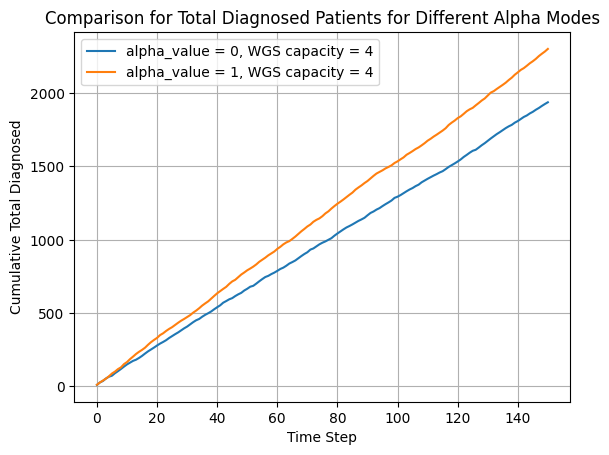

In [ ]:
plt.figure()
alpha_values = [0,1]
WGS_value = 2925.25
WGS_capacity = 4
max_steps = 200

for alpha in alpha_values:
    print(alpha)
   #random.seed(1000)
    model = HospitalModel(10, 10, 6, 3, 1, 1, alpha, WGS_value,WGS_capacity, max_steps)
    for _ in range(max_steps):
        model.step()
    series = pd.Series(model.totaldiagnosed)
    cumulative_diagnosed = series.iloc[49:].cumsum().tolist()
    #cumulative_diagnosed = np.cumsum(model.totaldiagnosed)
    plt.plot(cumulative_diagnosed, label=f'alpha_value = {alpha}, WGS capacity = {WGS_capacity}')

plt.title('Comparison for Total Diagnosed Patients for Different Alpha Modes')
plt.xlabel("Time Step")
plt.ylabel("Cumulative Total Diagnosed")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Model with alpha comparing total cumulative cost

Streaming output truncated to the last 5000 lines.
 1333 1349 1363 1374 1386 1398 1410 1428 1448 1466 1482 1499 1514 1525
 1539 1548 1562 1581 1595 1610 1625 1642 1659 1678 1692 1708 1725 1741
 1762 1778 1798 1812 1826 1839 1860 1879 1900 1914 1925 1936 1951 1963
 1978 1990 2005 2021 2035 2049 2067 2082 2097 2110 2128 2141]
General 1
Total Patients: 2
diagnosed: 1
referred to Teaching Hospital: 14
closest Teaching: 3
Total cost: 668.28
General 2
Total Patients: 2
diagnosed: 1
referred to Teaching Hospital: 16
closest Teaching: 1
Total cost: 668.28
General 3
Total Patients: 2
diagnosed: 1
referred to Teaching Hospital: 9
closest Teaching: 2
Total cost: 668.28
General 4
Total Patients: 2
diagnosed: 1
referred to Teaching Hospital: 12
closest Teaching: 1
Total cost: 668.28
General 5
Total Patients: 2
diagnosed: 1
referred to Teaching Hospital: 15
closest Teaching: 3
Total cost: 668.28
General 6
Total Patients: 2
diagnosed: 1
referred to Teaching Hospital: 13
closest Teaching: 1
Total cost

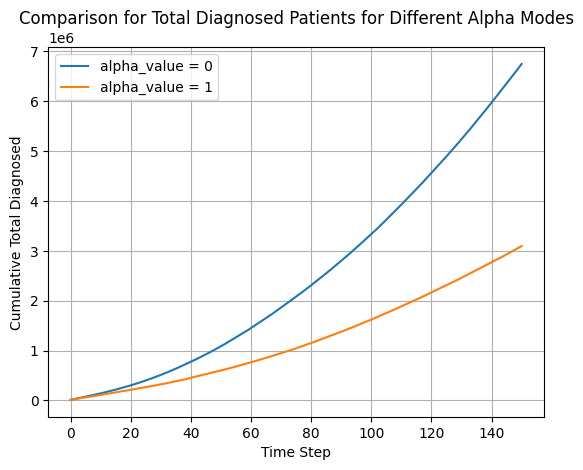

In [ ]:
plt.figure()
alpha_value = [0,1]
WGS_value = 2925.25
WGS_capacity = 4
max_steps = 200

for alpha_value in alpha_value:
    print(alpha_value)
    random.seed(1000)
    model = HospitalModel(10, 10, 6, 3, 1, 1, alpha_value, WGS_value, WGS_capacity,max_steps)
    for _ in range(max_steps):
        model.step()
    series = pd.Series(model.totalcost)
    cumulative_cost = series.iloc[49:].cumsum().tolist()
    #cumulative_diagnosed = np.cumsum(model.totaldiagnosed)
    plt.plot(cumulative_cost, label=f'alpha_value = {alpha_value}')

plt.title('Comparison for Total Diagnosed Patients for Different Alpha Modes')
plt.xlabel("Time Step")
plt.ylabel("Cumulative Total Diagnosed")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
alpha_value = [0,0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1]
# Loop over different k values

for alpha_value in alpha_value:
    print(alpha_value)
    #random.seed(2546)
    model = HospitalModel(10,10,6, 3, 1,1, alpha_value)
    for _ in range(200):
        model.step()

    # Plot the line for the current k value for total cost, total diagnosed patients, total patients
    # Plot the line for the current k value for total cost
        #print(model.totaldiagnosed)
        print(model.totaldiagnosed)
    plt.plot(model.totaldiagnosed, label=f'alpha={alpha_value}')


plt.xlabel("Time")
plt.ylabel("Totaldiagnosed")
plt.legend(loc='upper left')
plt.show()

0


TypeError: HospitalModel.__init__() missing 1 required positional argument: 'WGS_value'

<Figure size 640x480 with 0 Axes>

General Hospital ratio: 0.000249396460565432
Teaching Hospital ratio: 0.00016451517017416304
Academic Hospital ratio: 7.13150623002679e-05
Ratio for all hospitals: 0.00026493001094245216


# Plotting results

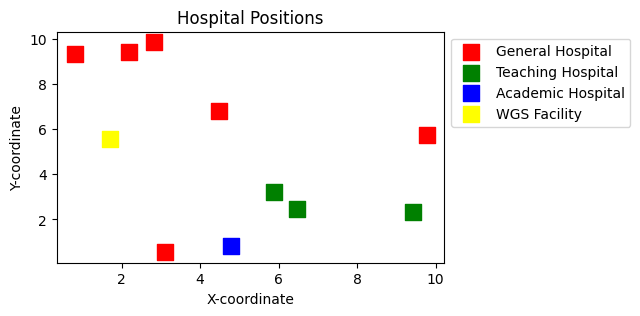

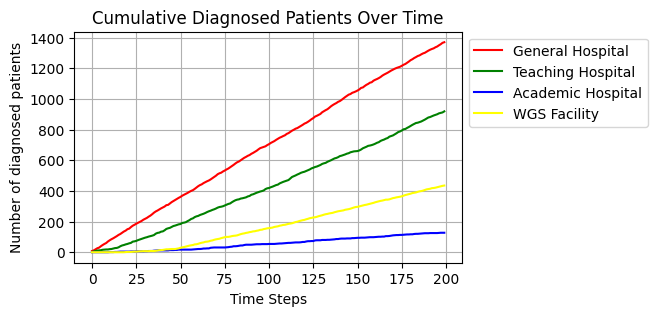

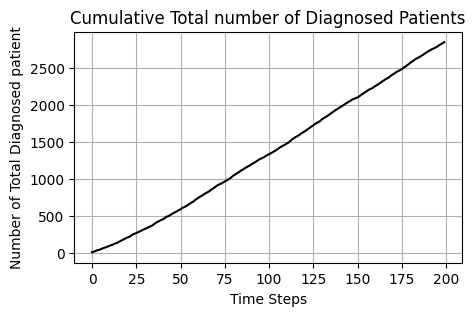

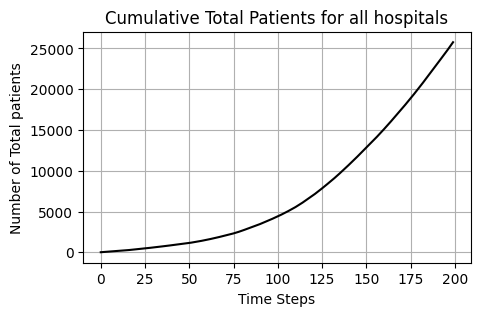

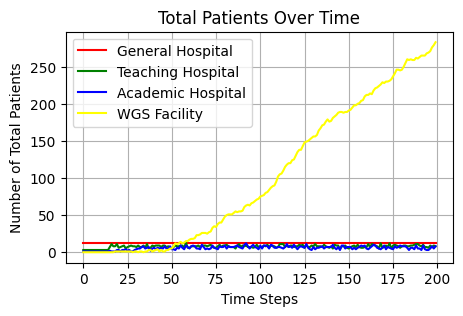

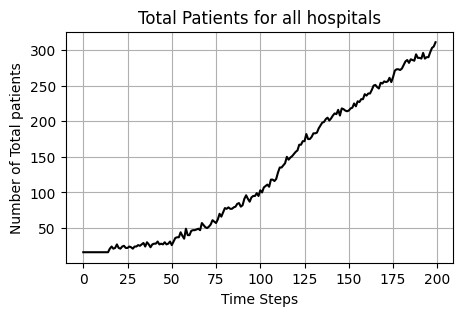

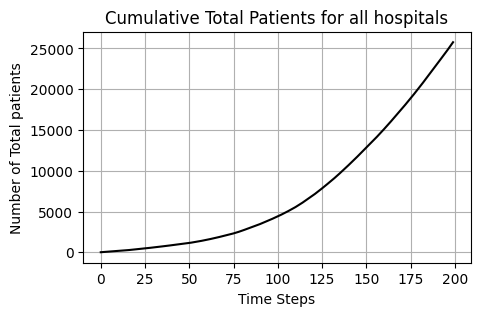

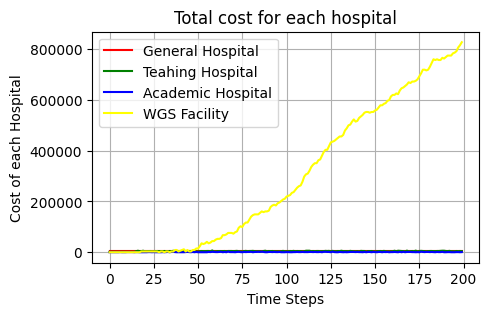

CUMULATIBE GENERAL COST: [  4009.68   8019.36  12029.04  16038.72  20048.4   24058.08  28067.76
  32077.44  36087.12  40096.8   44106.48  48116.16  52125.84  56135.52
  60145.2   64154.88  68164.56  72174.24  76183.92  80193.6   84203.28
  88212.96  92222.64  96232.32 100242.   104251.68 108261.36 112271.04
 116280.72 120290.4  124300.08 128309.76 132319.44 136329.12 140338.8
 144348.48 148358.16 152367.84 156377.52 160387.2  164396.88 168406.56
 172416.24 176425.92 180435.6  184445.28 188454.96 192464.64 196474.32
 200484.   204493.68 208503.36 212513.04 216522.72 220532.4  224542.08
 228551.76 232561.44 236571.12 240580.8  244590.48 248600.16 252609.84
 256619.52 260629.2  264638.88 268648.56 272658.24 276667.92 280677.6
 284687.28 288696.96 292706.64 296716.32 300726.   304735.68 308745.36
 312755.04 316764.72 320774.4  324784.08 328793.76 332803.44 336813.12
 340822.8  344832.48 348842.16 352851.84 356861.52 360871.2  364880.88
 368890.56 372900.24 376909.92 380919.6  384929.28 388

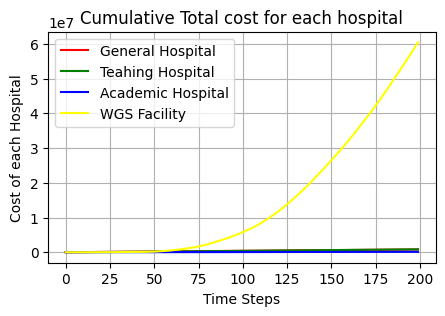

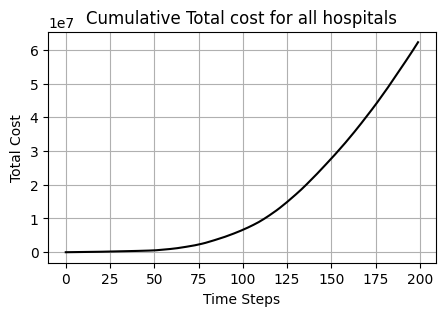

In [ ]:
# Visualize hospitals
model.visualize_hospitals()
#Visualizing diagnosed patients
#model.diagnosed_for_each_hospital()
model.cumulative_diagnosed_for_each_hospital()
#model.total_diagnosed()
model.cumulative_total_diagnosed()
model.cumulative_total_patients()
# Visualize total patients
model.total_patients_for_each_hospital()
model.total_patients()
model.cumulative_total_patients()
#model.refer_p()
#visualize total cost for each hospitals
model.totalcost_for_each_hospital()
model.cumulative_totalcost_for_each_hospital()
model.cumulative_totalcost()

